In [1]:
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from keras.models import Sequential, Model, load_model
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16, preprocess_input

%matplotlib inline

In [2]:
train_path = 'train'
test_path = 'test'

## Image Augmentation ##

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=(0.2),
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), classes=['barack_obama','donald_trump','joe_biden'], batch_size=10)
test_set = test_datagen.flow_from_directory(test_path, target_size=(224,224), classes=['barack_obama','donald_trump','joe_biden'], batch_size=10)

Found 1500 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


### Sample ###

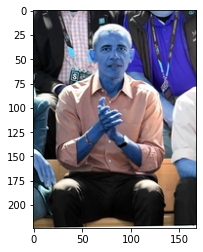

In [5]:
categories = ['barack_obama','donald_trump','joe_biden']

for category in categories:
    path = os.path.join(train_path, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

## ResNet50 ##

In [6]:
resnet = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [7]:
for layer in resnet.layers:
    layer.trainable = False

In [8]:
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
r = model.fit(
    train_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch=50,
    validation_steps=10   
)

Epoch 1/10
50/50 [==============================] - 86s 967ms/step - loss: 5.1392 - accuracy: 0.3521 - val_loss: 1.9136 - val_accuracy: 0.4300
Epoch 2/10
50/50 [==============================] - 45s 908ms/step - loss: 1.8796 - accuracy: 0.3896 - val_loss: 2.0111 - val_accuracy: 0.4900
Epoch 3/10
50/50 [==============================] - 42s 843ms/step - loss: 2.2669 - accuracy: 0.4013 - val_loss: 2.0551 - val_accuracy: 0.3600
Epoch 4/10
50/50 [==============================] - 45s 902ms/step - loss: 1.3484 - accuracy: 0.4842 - val_loss: 2.2661 - val_accuracy: 0.4300
Epoch 5/10
50/50 [==============================] - 43s 862ms/step - loss: 1.9226 - accuracy: 0.4765 - val_loss: 1.6250 - val_accuracy: 0.4100
Epoch 6/10
50/50 [==============================] - 43s 866ms/step - loss: 1.7748 - accuracy: 0.4631 - val_loss: 1.8275 - val_accuracy: 0.4000
Epoch 7/10
50/50 [==============================] - 49s 979ms/step - loss: 1.5090 - accuracy: 0.5075 - val_loss: 2.2331 - val_accuracy: 0.4200

Text(0.5, 1.0, 'Accuracy over 10 Epochs')

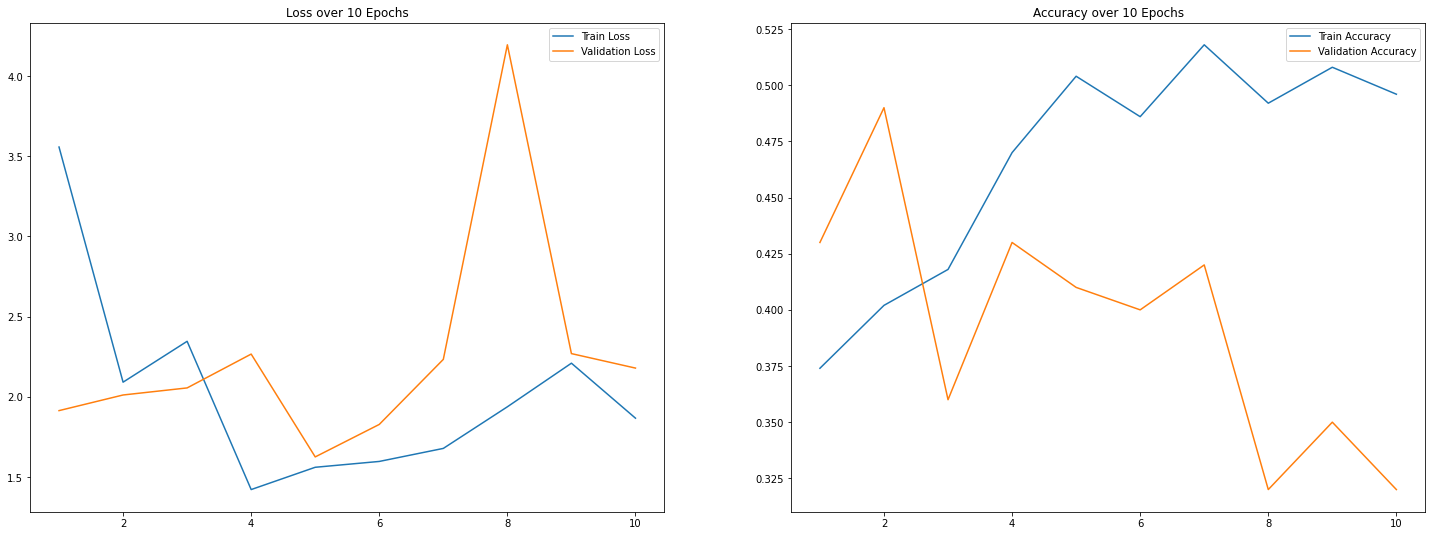

In [13]:
f, ax = plt.subplots(1, 2, figsize=(25,9)) 
sns.lineplot(range(1, 11), r.history['loss'], label='Train Loss', ax=ax[0])
sns.lineplot(range(1, 11), r.history['val_loss'], label='Validation Loss', ax=ax[0])
ax[0].set_title('Loss over 10 Epochs')

sns.lineplot(range(1, 11), r.history['accuracy'], label='Train Accuracy', ax=ax[1])
sns.lineplot(range(1, 11), r.history['val_accuracy'], label='Validation Accuracy', ax=ax[1])
ax[1].set_title('Accuracy over 10 Epochs')

In [14]:
model.save('model_resnet50.h5')

C:\Users\Howard\AppData\Roaming\Python\Python37\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## VGG16 ##

In [15]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [16]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
x1 = Flatten()(vgg.output)

In [18]:
prediction1 = Dense(3, activation='softmax')(x1)

In [19]:
model1 = Model(inputs=vgg.input, outputs=prediction1)

In [20]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [21]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
r1 = model1.fit(
    train_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch=50,
    validation_steps=10   
)

Epoch 1/10
50/50 [==============================] - 108s 2s/step - loss: 1.4217 - accuracy: 0.4377 - val_loss: 1.7123 - val_accuracy: 0.4500
Epoch 2/10
50/50 [==============================] - 104s 2s/step - loss: 0.9861 - accuracy: 0.5961 - val_loss: 1.1200 - val_accuracy: 0.6200
Epoch 3/10
50/50 [==============================] - 95s 2s/step - loss: 0.6221 - accuracy: 0.7579 - val_loss: 1.3100 - val_accuracy: 0.5400
Epoch 4/10
50/50 [==============================] - 98s 2s/step - loss: 0.4524 - accuracy: 0.8215 - val_loss: 1.0795 - val_accuracy: 0.6000
Epoch 5/10
50/50 [==============================] - 94s 2s/step - loss: 0.4645 - accuracy: 0.8233 - val_loss: 1.1258 - val_accuracy: 0.6200
Epoch 6/10
50/50 [==============================] - 92s 2s/step - loss: 0.4079 - accuracy: 0.8410 - val_loss: 1.2986 - val_accuracy: 0.6500
Epoch 7/10
50/50 [==============================] - 89s 2s/step - loss: 0.3021 - accuracy: 0.8780 - val_loss: 1.0710 - val_accuracy: 0.6700
Epoch 8/10
50/50 [

Text(0.5, 1.0, 'Accuracy over 10 Epochs')

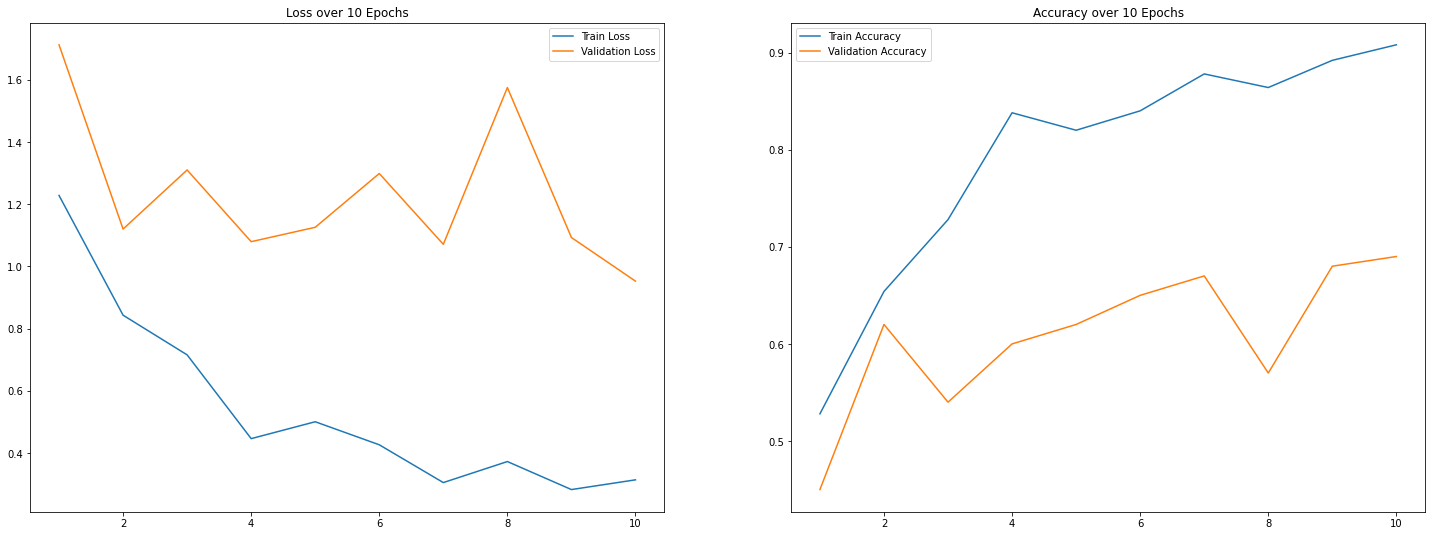

In [23]:
f, ax = plt.subplots(1, 2, figsize=(25,9)) 
sns.lineplot(range(1, 11), r1.history['loss'], label='Train Loss', ax=ax[0])
sns.lineplot(range(1, 11), r1.history['val_loss'], label='Validation Loss', ax=ax[0])
ax[0].set_title('Loss over 10 Epochs')

sns.lineplot(range(1, 11), r1.history['accuracy'], label='Train Accuracy', ax=ax[1])
sns.lineplot(range(1, 11), r1.history['val_accuracy'], label='Validation Accuracy', ax=ax[1])
ax[1].set_title('Accuracy over 10 Epochs')

In [24]:
model1.save('model_vgg16.h5')

## Prediction (ResNet50 vs VGG16) ##

In [36]:
predictor_resnet50 = load_model('model_resnet50.h5')
predictor_vgg16 = load_model('model_vgg16.h5')

In [27]:
from IPython.display import Image, display
from keras.preprocessing import image

In [43]:
def model_predict(path, model):
    img = image.load_img(path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x / 225
    x = np.expand_dims(x, axis=0)
    
    pred = model.predict(x)
    pred = np.argmax(pred, axis=1)
    if pred == 0:
        pred = 'Barack Obama'
    elif pred == 1:
        pred = 'Donald Trump'
    else:
        pred = 'Joe Biden'
    return pred

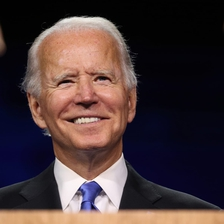

In [28]:
display(Image(filename='joe-biden-gettyimages-1267438366_224.jpg'))

In [44]:
result_resnet50 = model_predict('joe-biden-gettyimages-1267438366_224.jpg', predictor_resnet50)
result_vgg16 = model_predict('joe-biden-gettyimages-1267438366_224.jpg', predictor_vgg16)
print('ResNet50 Prediction: ', result_resnet50)
print('VGG16 Prediction: ', result_vgg16)

ResNet50 Prediction:  Barack Obama
VGG16 Prediction:  Joe Biden


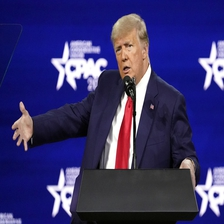

In [30]:
display(Image(filename='AP_21059818474607_224.jpg'))

In [45]:
result_resnet50 = model_predict('AP_21059818474607_224.jpg', predictor_resnet50)
result_vgg16 = model_predict('AP_21059818474607_224.jpg', predictor_vgg16)
print('ResNet50 Prediction: ', result_resnet50)
print('VGG16 Prediction: ', result_vgg16)

ResNet50 Prediction:  Donald Trump
VGG16 Prediction:  Donald Trump


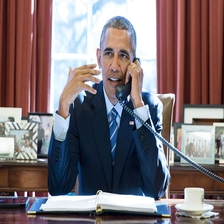

In [32]:
display(Image(filename='the-obamas-potus_224.jpg'))

In [46]:
result_resnet50 = model_predict('the-obamas-potus_224.jpg', predictor_resnet50)
result_vgg16 = model_predict('the-obamas-potus_224.jpg', predictor_vgg16)
print('ResNet50 Prediction: ', result_resnet50)
print('VGG16 Prediction: ', result_vgg16)

ResNet50 Prediction:  Joe Biden
VGG16 Prediction:  Barack Obama


### Verdict ###

The ResNet50 Model had lower training and validation accuracy compared to the VGG16 Model. This was reflected by the prediction samples above. The ResNet50 Model seemed to have confused Obama with Biden whereas the VGG16 Model predicted correctly in all 3 instances.